In [10]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import quad
from scipy.misc import derivative
import matplotlib.pyplot as plt
from functools import partial

In [11]:
h = 1e-2
dx = 1e-6
a = 2

In [12]:
def V(x):
    return x**2*(np.pi + np.arctan(x))

def H(x, p):
    return p**2/2 + V(x)

def Hp(x, p):
    return p

def ode(t, y):
    x, p, Phi = y[0], y[1], y[2]

    return [
        p, 
        -2*x*(np.pi+np.arctan(x)) - x**2/(1+x**2),
        p*Hp(p, x) - H(p, x)
    ]

In [23]:
# def p(alpha):
#     return a  # On initial surface (t=0) p is const and equals a
def X(alpha, t):
    x_0 = alpha
    p_0 = a
    Phi_0 = 0  # Because of t = 0
    t_span = [0, t]
    sol = solve_ivp(ode, t_span, [x_0, p_0, Phi_0], t_eval=[t])

    return sol.y[0][0]

def p(alpha, t):
    x_0 = alpha
    p_0 = a
    Phi_0 = 0  # Because of t = 0
    t_span = [0, t]
    sol = solve_ivp(ode, t_span, [x_0, p_0, Phi_0], t_eval=[t])

    return sol.y[1][0]

def Phi(alpha, t):
    x_0 = alpha
    p_0 = a
    Phi_0 = 0  # Because of t = 0
    t_span = [0, t]
    sol = solve_ivp(ode, t_span, [x_0, p_0, Phi_0], t_eval=[t])

    return sol.y[2][0]

def J(alpha, t):
    X_halfed = partial(X, t=t)
    return np.abs(derivative(X_halfed, alpha, dx=dx))

def S(alpha, t):
    return quad(lambda a: p(a, t=t) * J(a, t=t), 0, alpha)[0]

In [14]:
def psi(i, t):
    # i - index in alphas and xs arrays
    mu_t = 0
    m_n = 0
    A = 1
    x = xs[i]  # Formally it is useless
    a = alphas[i]
    
    return np.exp(1j/h*Phi(a, t) + 1j*np.pi/2*(mu_t - m_n)) * A/np.sqrt(J(a, t)) * np.exp(1j/h*S(a, t))

In [39]:
t = 0.1
alphas = np.linspace(-0.3, 0.3, 100)
xs = [X(a, t) for a in alphas]
xs

[-0.09352219512919825,
 -0.08761221732664777,
 -0.08170315582164588,
 -0.07579501833513003,
 -0.06988781245585575,
 -0.06398154563487098,
 -0.05807622518002821,
 -0.05217185825054384,
 -0.04626845185161052,
 -0.040366012829072234,
 -0.03446454786416821,
 -0.028564063468353874,
 -0.022664565978207117,
 -0.01676606155042716,
 -0.010868556156933305,
 -0.004972055580071754,
 0.0009234345920616539,
 0.006817908970177044,
 0.012711362368214435,
 0.01860378980763209,
 0.024495186521548667,
 0.030385547958735843,
 0.03627486978745244,
 0.04216314789911329,
 0.04805037841178958,
 0.05393655767353091,
 0.05982168226550527,
 0.06570574900495216,
 0.07158875494794097,
 0.07747069739193292,
 0.08335157387813812,
 0.08923138219366655,
 0.09511012037346636,
 0.10098778670204556,
 0.10686437971497333,
 0.11273989820015531,
 0.11861434119887734,
 0.12448770800661081,
 0.13035999817356916,
 0.13623121150499753,
 0.1421013480611688,
 0.14797040815703227,
 0.15383839236140906,
 0.15970530149550885,
 0.165

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*


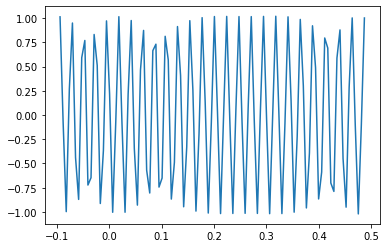

In [41]:
psis = []
for i, _ in enumerate(xs):
    P = psi(i, t)
    print('*')
    psis.append(P)
    
plt.plot(xs, psis)

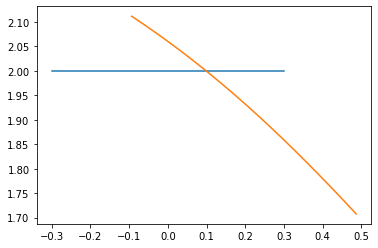

In [40]:
# Вращение лагранжевой поверхности в зависимости от времени
rks = []
for alpha in alphas:
    x_0 = alpha
    p_0 = a
    Phi_0 = 0
    t_span = [0, t]
    sol = solve_ivp(ode, t_span, [x_0, p_0, Phi_0], t_eval=[t])
    rks.append([sol.y[0][0], sol.y[1][0]])
    
plt.plot(alphas, [a for _ in xs])
plt.plot([pair[0] for pair in rks], [pair[1] for pair in rks])